# Trade Data Background and Insights

https://ec.europa.eu/eurostat/web/international-trade-in-goods

International trade in goods statistics (ITGS) published by Eurostat measure the value and quantity of goods traded between the EU Member States and their trade partners. The data contain the import of three goods. 

Self-explanatory descriptions (https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&StrNom=CN_2022&StrLanguageCode=EN&IntPcKey=&StrLayoutCode=HIERARCHIC&IntCurrentPage=1):
- Sunflower oil
    - index=0 15121191: Crude sunflower-seed oil (excl. for technical or industrial uses) 
    - index=1 15121990: Sunflower-seed or safflower oil and their fractions, whether or not refined, but not chemically modified (excl. for technical or industrial uses and crude)

- Maize corn:
    - index=0 10059000: Maize (excl. seed for sowing)
    
- Wheat:
    - index=0 10011900: Durum wheat (excl. seed for sowing)
    - index=1 10019900: Wheat and meslin (excl. seed for sowing, and durum wheat)
    - index=2 10081000: Buckwheat

The data contains among others, the following four fields for the case:
- TIME_PERIOD: the month in which the goods were imported
- declarant: The country to where the goods are imported (3 = The Netherlands)
- partner: The country where the goods originate from.
- indicators: Indicates whether the value is the Quantity or the Value measure
- OBS_Value: the field that indicates the actual value.

#### Create Dataframe for each good 

In [1]:
import pandas as pd
import datetime

def process_csv(filepath, product_index):
    trade_data = pd.read_csv(filepath)

    trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
    trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
    trade_data = trade_data.drop_duplicates()
    #trade_data = trade_data.dropna()

    products = trade_data["product"].drop_duplicates().to_list()
    product_filter = products[product_index]

    partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")

    trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

    trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                                  columns='indicators', 
                                  values=['OBS_VALUE'])

    trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
    trade_data_pivot = trade_data_pivot.reset_index()
    trade_data_pivot = trade_data_pivot.dropna()

    df = trade_data_pivot
    df_product_filtered = df[df['product'] == product_filter]
    
    return df_product_filtered

#Declare DataFrames for all good/productcode combinations
df_sunflower_oil_0 = process_csv("trade_data/sunflower_oil.csv", 0)
df_sunflower_oil_1 = process_csv("trade_data/sunflower_oil.csv", 1)
df_maize_corn_0 = process_csv("trade_data/maize_corn.csv", 0)
df_wheat_0 = process_csv("trade_data/wheat.csv", 0)
df_wheat_1 = process_csv("trade_data/wheat.csv", 1)
df_wheat_2 = process_csv("trade_data/wheat.csv", 2)




In [14]:
df_sunflower_oil_0

,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO
0,Argentina,2005-01-01,15121191,21086.3,10489.97
1,Argentina,2005-02-01,15121191,18325.9,8946.33
2,Argentina,2005-03-01,15121191,25661.5,12741.53
3,Argentina,2005-04-01,15121191,33839.2,16665.38
4,Argentina,2005-05-01,15121191,41051.1,19921.35
...,...,...,...,...,...
7476,United States,2022-07-01,15121191,3.8,6.01
7478,United States,2022-08-01,15121191,3.3,5.29
7480,United States,2022-09-01,15121191,13.1,20.82
7482,United States,2022-10-01,15121191,3.6,5.68


In [35]:
from functools import reduce
dfs = [df_sunflower_oil_0, df_sunflower_oil_1, df_maize_corn_0, df_wheat_0, df_wheat_1, df_wheat_2]
merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)

merged_df

C:\Users\basbe\AppData\Local\Temp\ipykernel_23568\61618327.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'OBS_VALUE_QUANTITY_TON_x', 'OBS_VALUE_VALUE_1000EURO_x', 'product_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)
C:\Users\basbe\AppData\Local\Temp\ipykernel_23568\61618327.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'OBS_VALUE_QUANTITY_TON_x', 'OBS_VALUE_VALUE_1000EURO_x', 'product_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left,right: pd.merge(left,right,on=['PARTNER_Labels','TIME_PERIOD'], how='outer'), dfs)


,PARTNER_Labels,TIME_PERIOD,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y,product_x,OBS_VALUE_QUANTITY_TON_x,OBS_VALUE_VALUE_1000EURO_x,product_y,OBS_VALUE_QUANTITY_TON_y,OBS_VALUE_VALUE_1000EURO_y
0,Argentina,2005-01-01,15121191.0,21086.3,10489.97,NaN,NaN,NaN,10059000.0,8100.0,937.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,2005-02-01,15121191.0,18325.9,8946.33,NaN,NaN,NaN,10059000.0,3172.0,392.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,2005-03-01,15121191.0,25661.5,12741.53,NaN,NaN,NaN,10059000.0,17733.4,2133.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,2005-04-01,15121191.0,33839.2,16665.38,NaN,NaN,NaN,10059000.0,10709.9,1174.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,2005-05-01,15121191.0,41051.1,19921.35,NaN,NaN,NaN,10059000.0,663.9,86.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,Russia,2010-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,75.0,32.25
6943,Russia,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,44.0,33.89
6944,Switzerland,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,3.0,5.03
6945,Switzerland,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100810.0,2.8,10.38


In [31]:
# Remove duplicate rows based on TIME_PERIOD column
merged_df = merged_df.drop_duplicates(subset='TIME_PERIOD')

# Group the dataframe by TIME_PERIOD and PARTNER_Labels
grouped = merged_df.groupby(['TIME_PERIOD','PARTNER_Labels'])

# Define function to apply to each group
def filter_rows(group):
    if group['PARTNER_Labels'].values[0] == group.name[1]:
        return group
    else:
        return pd.DataFrame({"TIME_PERIOD": group.name[0],
                            "PARTNER_Labels": group.name[1],
                            "product_x": np.nan,
                            "OBS_VALUE_QUANTITY_TON_x": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_x": np.nan,
                            "product_y": np.nan,
                            "OBS_VALUE_QUANTITY_TON_y": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_y": np.nan,
                            "product_x_1": np.nan,
                            "OBS_VALUE_QUANTITY_TON_x_1": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_x_1": np.nan,
                            "product_y_1": np.nan,
                            "OBS_VALUE_QUANTITY_TON_y_1": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_y_1": np.nan,
                            "product_x_2": np.nan,
                            "OBS_VALUE_QUANTITY_TON_x_2": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_x_2": np.nan,
                            "product_y_2": np.nan,
                            "OBS_VALUE_QUANTITY_TON_y_2": np.nan,
                            "OBS_VALUE_VALUE_1000EURO_y_2": np.nan,
                            })

# Apply function to each group
filtered_df = grouped.apply(filter_rows)


In [33]:
grouped

In [36]:
# Create list of all unique Time Periods
time = merged_df['TIME_PERIOD'].unique()

# Create list of all unique countries
countries = merged_df['PARTNER_Labels'].unique()
countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Chile', 'China', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'India', 'Indonesia',
       'Iran, Islamic Republic of', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico',
       'Moldova', 'Mozambique', 'Namibia', 'North Macedonia', 'Norway',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Türkiye', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay',
       'Armenia', 'Bosnia and Herzegovina', 'Brazil', 'Canada',
       'Colombia', "Côte d'Ivoire", 'Ethiopia', 'Ghana', 'Iraq',
       'Kazakhstan', 'Kosovo', 'Lebanon', 'Malaysia', 'Montenegro',
       'Morocco', 'Nigeria', 'Oman', 'Pakis

In [29]:
# Create a MultiIndex by using the from_product method
multiindex = pd.MultiIndex.from_product([time, countries, merged_df.columns], names=['TIME_PERIOD', 'PARTNER_Labels','VARIABLES'])

# Create an empty DataFrame with the MultiIndex
panel_data = pd.DataFrame(index=multiindex)

# Iterate over rows of the original DataFrame and update the panel DataFrame
for row in merged_df.itertuples():
    panel_data.loc[row.TIME_PERIOD, row.PARTNER_Labels] = row[2:]

C:\Users\basbe\AppData\Local\Temp\ipykernel_23568\3079583691.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  panel_data.loc[row.TIME_PERIOD, row.PARTNER_Labels] = row[2:]


ValueError: Must have equal len keys and value when setting with an iterable

In [16]:
writer = pd.ExcelWriter('merged_df.xlsx')
merged_df.to_excel(writer, 'Sheet1')
writer.save()

In [3]:
filepaths = ["trade_data/sunflower_oil.csv", "trade_data/maize_corn.csv", "trade_data/wheat.csv"]
df_list = []
for filepath in filepaths:
    for product_index in range(3):
        try:
            df = process_csv(filepath, product_index)
            df_list.append(df)
        except:
            continue
df_final = pd.concat(df_list, axis=1)

In [4]:
df_final

,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO,...,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO
0,Argentina,2005-01-01,15121191.0,21086.3,10489.97,NaN,NaN,NaN,NaN,NaN,...,Argentina,2017-02-01,100199.0,369.6,129.36,NaN,NaN,NaN,NaN,NaN
1,Argentina,2005-02-01,15121191.0,18325.9,8946.33,NaN,NaN,NaN,NaN,NaN,...,Argentina,2019-03-01,100199.0,432.9,93.90,NaN,NaN,NaN,NaN,NaN
2,Argentina,2005-03-01,15121191.0,25661.5,12741.53,NaN,NaN,NaN,NaN,NaN,...,Australia,2022-10-01,100199.0,0.0,0.01,NaN,NaN,NaN,NaN,NaN
3,Argentina,2005-04-01,15121191.0,33839.2,16665.38,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Austria,2010-03-01,100810.0,25.7,7.95
4,Argentina,2005-05-01,15121191.0,41051.1,19921.35,NaN,NaN,NaN,NaN,NaN,...,Austria,2013-04-01,100199.0,1294.8,400.08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,2021-07-01,100810.0,0.0,0.07
7813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,2021-08-01,100810.0,0.0,0.02
7814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,2021-11-01,100810.0,0.0,0.01
7815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,2022-02-01,100810.0,0.0,0.01


## Top 10 partner countries for each good and every product (average (!!!) import quantity)

In [14]:
def get_means_list(df):
    # Select the columns to use
    df = df[["PARTNER_Labels", "OBS_VALUE_QUANTITY_TON"]]

    # Group the data by the unique values in "column1"
    grouped_df = df.groupby("PARTNER_Labels")

    # Take the mean of "column2" for each group
    means = grouped_df["OBS_VALUE_QUANTITY_TON"].mean()

    # Sort the means in descending order
    sorted_means = means.sort_values(ascending=False)

    # Save the means in a list
    means_list = list(zip(sorted_means.index, sorted_means))

    return means_list[:10]

# Call the function and store the result in a variable
means_list_sunflower_oil_0 = get_means_list(df_sunflower_oil_0)
means_list_sunflower_oil_1 = get_means_list(df_sunflower_oil_1)
means_list_maize_corn_0 = get_means_list(df_maize_corn_0)
means_list_wheat_0 = get_means_list(df_wheat_0)
means_list_wheat_1 = get_means_list(df_wheat_1)
means_list_wheat_2 = get_means_list(df_wheat_2)

dfs_and_means = [
    (df_sunflower_oil_0, means_list_sunflower_oil_0),
    (df_sunflower_oil_1, means_list_sunflower_oil_1),
    (df_maize_corn_0, means_list_maize_corn_0),
    (df_wheat_0, means_list_wheat_0),
    (df_wheat_1, means_list_wheat_1),
    (df_wheat_2, means_list_wheat_2),
]

# Create an empty list to store the rows of the final DataFrame
rows = []

# Iterate over the list of tuples and create a row for each dataframe
for df, means_list in dfs_and_means:
    # Create a dictionary with the data for the current row
    row = {
        '#1': means_list[0],
        '#2': means_list[1],
        '#3': means_list[2],
        '#4': means_list[3],
        '#5': means_list[4],
        '#6': means_list[5],
        '#7': means_list[6],
        '#8': means_list[7],
        '#9': means_list[8],
        '#10': means_list[9],
        # Add more columns here if needed
    }
    # Append the row to the list of rows
    rows.append(row)

# Create a DataFrame from the rows
df_means = pd.DataFrame(rows)

# Display the DataFrame (transpose)
df_top10 = df_means.T
df_top10.columns=['Crude sunflower-seed oil', 'Sunflower-seed or safflower oil', ' Maize', 'Durum wheat', 'Wheat and meslin', 'Buckwheat']
df_top10

,Crude sunflower-seed oil,Sunflower-seed or safflower oil,Maize,Durum wheat,Wheat and meslin,Buckwheat
#1,"(Ukraine, 20906.436842105264)","(Moldova, 4342.733333333334)","(Ukraine, 149147.13092105262)","(Germany, 7004.943076923077)","(France, 151817.47999999998)","(China, 255.92868852459017)"
#2,"(Argentina, 8412.71794871795)","(Ukraine, 2922.2754098360656)","(France, 97283.62523364487)","(United States, 5456.25)","(Germany, 87141.07384615384)","(Poland, 183.73541666666665)"
#3,"(Philippines, 6975.2)","(Belgium, 2769.3602803738318)","(Brazil, 54848.87810218978)","(Canada, 5141.782978723404)","(Belgium, 32241.18230769231)","(Lithuania, 159.36666666666667)"
#4,"(Hungary, 6268.249606299212)","(Germany, 2332.8271028037384)","(Germany, 33330.11915887851)","(Belgium, 4754.033076923078)","(Serbia, 22012.099999999995)","(New Zealand, 64.27777777777777)"
#5,"(Bolivia, 3119.2599999999998)","(France, 985.1616822429907)","(Romania, 31279.176229508197)","(Russia, 4400.0)","(United Kingdom, 15085.814728682171)","(Ukraine, 38.89)"
#6,"(Moldova, 2612.4285714285716)","(Spain, 330.0284615384615)","(Hungary, 18668.968691588783)","(France, 4113.1411290322585)","(Romania, 13922.781651376146)","(Russia, 37.334782608695654)"
#7,"(Russia, 2543.2250000000004)","(Romania, 232.9738095238095)","(Russia, 16452.49662921348)","(Ukraine, 3157.5)","(Latvia, 7272.2043478260875)","(Belarus, 21.866666666666664)"
#8,"(France, 2023.478971962617)","(United Kingdom, 212.25898876404494)","(Serbia, 15256.206976744186)","(Kazakhstan, 2256.733333333333)","(Russia, 7094.7475)","(India, 19.16)"
#9,"(Bulgaria, 1063.9737373737373)","(Hungary, 168.11353383458646)","(Canada, 15220.123529411765)","(Moldova, 338.875)","(Ukraine, 6505.112087912087)","(Czechia, 15.504651162790699)"
#10,"(Norway, 973.4)","(Austria, 146.18727272727273)","(Belgium, 14056.164018691588)","(Spain, 287.8175824175824)","(Denmark, 5902.565853658536)","(Germany, 14.912637362637362)"


## Graphical Inspection

In [15]:
date_filter = datetime.date(year=2010,month=1,day=1)

### Ukraine's exports over time

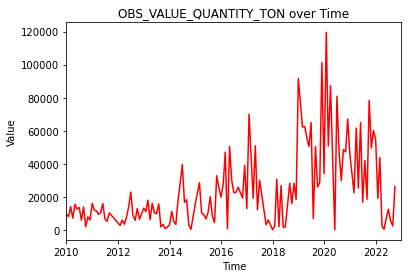

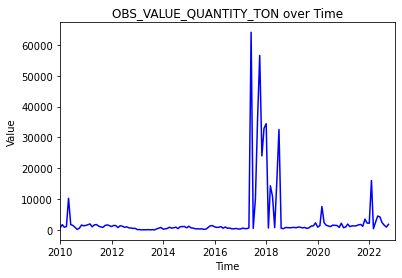

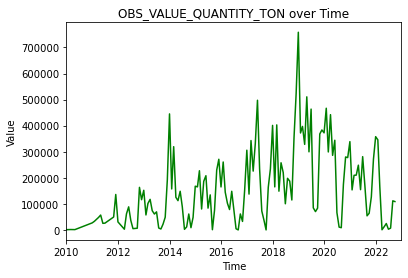

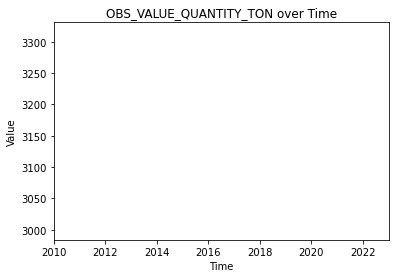

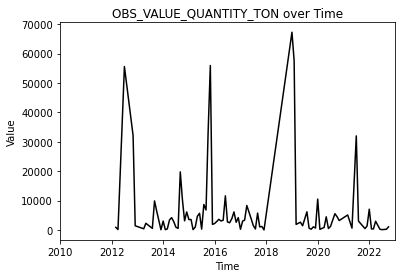

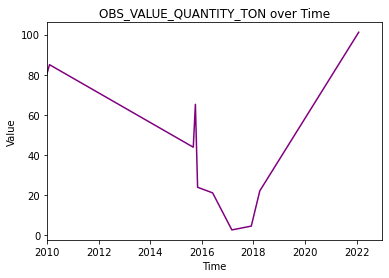

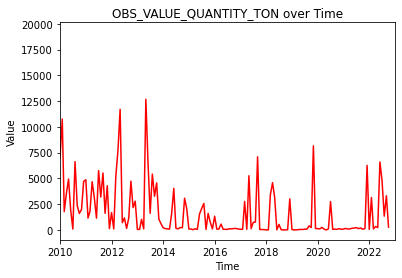

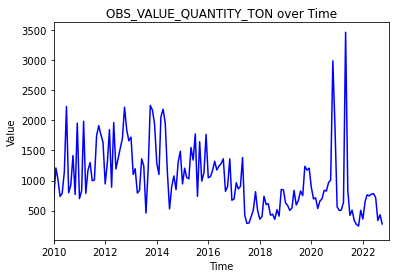

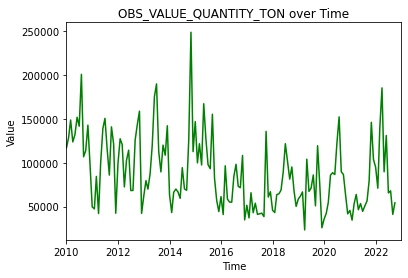

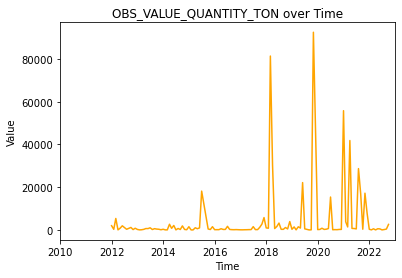

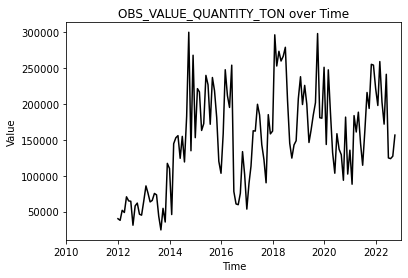

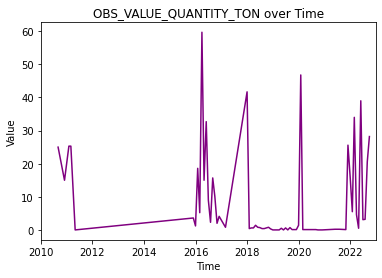

In [16]:
import matplotlib.pyplot as plt

# List of DataFrames
dataframes = [df_sunflower_oil_0, df_sunflower_oil_1, df_maize_corn_0, df_wheat_0, df_wheat_1, df_wheat_2]

# List of values for the 'Type' column
values = ['Ukraine', 'France']
#values = ['Ukraine', 'Germany', 'France', 'China', 'Moldova']

# List of colors
colors = ['red', 'blue', 'green', 'orange', 'black', 'purple']

#red: Crude sunflower-seed oil
#blue: Sunflower-seed or safflower oil
#green: Maize
#orange: Durum wheat
#black: Wheat and meslin
#purple: Buckwheat


for value in values:
    # Loop through each DataFrame and value
    for df, color in zip(dataframes, colors):
        # Select the rows where the value in the 'Type' column is 'Specific Value'
        df_specific_value = df[(df['PARTNER_Labels'] == value)]

        # Make a line plot with time on the x-axis and the 'Value' column on the y-axis
        plt.plot(df_specific_value['TIME_PERIOD'], df_specific_value['OBS_VALUE_QUANTITY_TON'], color=color)

        # Add a title and label the axes
        plt.title('OBS_VALUE_QUANTITY_TON over Time')
        plt.xlabel('Time')
        plt.ylabel('Value')

        # Set the x-axis limits
        plt.xlim(date_filter, pd.Timestamp('2022-12-30'))

        # Display the plot
        plt.show()

### BELOW IS CODE JUNK

In [17]:
import pandas as pd
import datetime

trade_data = pd.read_csv("trade_data/wheat.csv")

trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
trade_data = trade_data.drop_duplicates()
#trade_data = trade_data.dropna()

products = trade_data["product"].drop_duplicates().to_list()
product_filter = products[1]

partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")

trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                              columns='indicators', 
                              values=['OBS_VALUE'])

trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
trade_data_pivot = trade_data_pivot.reset_index()
trade_data_pivot = trade_data_pivot.dropna()

df = trade_data_pivot


In [18]:
import pandas as pd
import datetime

trade_data = pd.read_csv("trade_data/maize_corn.csv")

trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
trade_data = trade_data.drop_duplicates()
#trade_data = trade_data.dropna()


In [19]:
products = trade_data["product"].drop_duplicates().to_list()
product_filter = products[0]

trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

print(products)
print(product_filter)

[10059000]
10059000


#### We've also included a file with the labels for all the partner countries:

In [20]:
partner_countries = pd.read_csv("trade_data/partners.csv", sep = ";")
print(partner_countries.head(7))

   PARTNER_codes  PARTNER_Labels
0              1          France
1              3     Netherlands
2              4         Germany
3              5           Italy
4              6  United Kingdom
5              7         Ireland
6              8         Denmark


#### View of the data:

In [21]:
trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

print(trade_data.head(5))

               DATAFLOW        LAST UPDATE freq  DECLARANT_codes  \
0  ESTAT:DS-057380(1.0)  05/01/23 14:01:00    M                3   
1  ESTAT:DS-057380(1.0)  05/01/23 14:01:00    M                3   
2  ESTAT:DS-057380(1.0)  05/01/23 14:01:00    M                3   
3  ESTAT:DS-057380(1.0)  05/01/23 14:01:00    M                3   
4  ESTAT:DS-057380(1.0)  05/01/23 14:01:00    M                3   

   PARTNER_codes   product  flow  stat_regime    indicators TIME_PERIOD  \
0              1  10059000     1            1  QUANTITY_TON  2005-01-01   
1              1  10059000     1            1  QUANTITY_TON  2005-02-01   
2              1  10059000     1            1  QUANTITY_TON  2005-03-01   
3              1  10059000     1            1  QUANTITY_TON  2005-04-01   
4              1  10059000     1            1  QUANTITY_TON  2005-05-01   

   OBS_VALUE  OBS_FLAG PARTNER_Labels_x PARTNER_Labels_y  
0   106983.9       NaN           France           France  
1   126648.5       NaN

In [22]:

trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                              columns='indicators', 
                              values=['OBS_VALUE'])

trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
trade_data_pivot = trade_data_pivot.reset_index()
trade_data_pivot = trade_data_pivot.dropna()

df = trade_data_pivot

KeyError: 'PARTNER_Labels'

In [30]:
# Get a list of the unique values in the 'PARTNER_Labels' column
categories = df['PARTNER_Labels'].unique()

# Create an empty dictionary to store the results
results = {}

# Iterate over the categories
for category in categories:
  # Select rows where the value in the 'PARTNER_Labels' column is equal to the current category
  df_filtered = df[df['PARTNER_Labels'] == category]

  # Compute the mean of the 'Column2' column for the filtered data frame
  mean_value = df_filtered['OBS_VALUE_VALUE_1000EURO'].mean()

  # Add the mean value to the results dictionary
  results[category] = mean_value

# Sort the results in descending order
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted results
print(sorted_results)

{'France': 12084.959689440999, 'Germany': 5778.488257918548, 'Serbia': 4130.376666666667, 'Belgium': 2157.7988988764046, 'Ukraine': 1327.214803921569, 'United Kingdom': 1298.970178571429, 'Canada': 1157.4081967213117, 'Russia': 1105.6782812500003, 'Romania': 1031.9397003745337, 'Kazakhstan': 565.007, 'Denmark': 466.70218978102105, 'Latvia': 449.65196078431376, 'United States': 399.32333333333355, 'Sweden': 393.77688976377897, 'Lithuania': 364.0780519480517, 'Türkiye': 340.64074999999997, 'Bulgaria': 297.28088495575196, 'Moldova': 290.1665217391305, 'Estonia': 183.52133047210296, 'Poland': 159.80162371134028, 'Finland': 133.64056224899593, 'Hungary': 127.20515873015859, 'Czechia': 123.33176470588239, 'Argentina': 111.63000000000001, 'China': 94.66910569105687, 'Austria': 64.27756000000002, 'Spain': 46.973712121212124, 'Luxembourg': 40.99930921052638, 'New Zealand': 37.013400000000004, 'Italy': 36.51317829457367, 'Morocco': 30.89, 'Slovakia': 21.92301158301163, 'Croatia': 14.823756613756

In [ ]:
print(trade_data_pivot.head(5000))

# Graphical Inspection Data

In [ ]:
date_filter = datetime.date(year=2018,month=1,day=1)
date_filter

## Ukraine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = None
pd.options.display.max_columns = None

import datetime

# Select the rows where the value in the 'Type' column is 'Specific Value'
df_specific_value = df[(df['PARTNER_Labels'] == 'Ukraine') & (df['product'] == product_filter)]

# Make a line plot with time on the x-axis and the 'Value' column on the y-axis
plt.plot(df_specific_value['TIME_PERIOD'], df_specific_value['OBS_VALUE_QUANTITY_TON'])

# Add a title and label the axes
plt.title('Value (1000 Euro) over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Set the x-axis limits
plt.xlim(date_filter, pd.Timestamp('2022-12-30'))

# Show the plot
plt.show()

df_specific_value

In [23]:
df

,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO
0,Argentina,2017-02-01,100199,369.6,129.36
1,Argentina,2019-03-01,100199,432.9,93.90
2,Australia,2022-10-01,100199,0.0,0.01
3,Austria,2010-03-01,100810,25.7,7.95
4,Austria,2013-04-01,100199,1294.8,400.08
...,...,...,...,...,...
7813,United States,2021-08-01,100810,0.0,0.02
7814,United States,2021-11-01,100810,0.0,0.01
7815,United States,2022-02-01,100810,0.0,0.01
7816,United States,2022-05-01,100199,0.3,0.06


#### Global Graph:

In [24]:
trade_data_total = trade_data_pivot\
.groupby(['product', 'TIME_PERIOD']).agg({'OBS_VALUE_QUANTITY_TON': 'sum', 
                                          'OBS_VALUE_VALUE_1000EURO': 'sum'})

trade_data_total = trade_data_total.reset_index()
trade_data_total['price'] = trade_data_total['OBS_VALUE_VALUE_1000EURO']/trade_data_total['OBS_VALUE_QUANTITY_TON']

pd.options.display.max_rows = None
pd.options.display.max_columns = None


print(trade_data_total.head(5))

   product TIME_PERIOD  OBS_VALUE_QUANTITY_TON  OBS_VALUE_VALUE_1000EURO  \
0   100119  2012-01-01                 10246.4                   2163.74   
1   100119  2012-02-01                 14823.1                   3651.31   
2   100119  2012-03-01                 14406.4                   3073.63   
3   100119  2012-04-01                  3870.8                    886.93   
4   100119  2012-05-01                  5339.7                   1313.20   

      price  
0  0.211171  
1  0.246326  
2  0.213352  
3  0.229134  
4  0.245931  


<AxesSubplot:xlabel='TIME_PERIOD'>

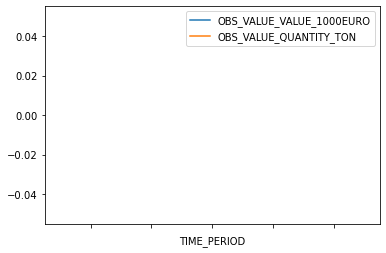

In [25]:
trade_data_total[(trade_data_total['TIME_PERIOD']>=date_filter)&
                (trade_data_total['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_VALUE_1000EURO', 'OBS_VALUE_QUANTITY_TON']]\
.set_index('TIME_PERIOD').plot()

<AxesSubplot:xlabel='TIME_PERIOD'>

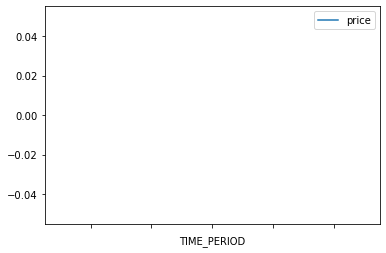

In [26]:
trade_data_total[(trade_data_total['TIME_PERIOD']>=date_filter)&
                (trade_data_total['product']==product_filter)]\
[['TIME_PERIOD', 'price']]\
.set_index('TIME_PERIOD').plot()

# Trade data

#### Graphs of specific Countries:

<AxesSubplot:xlabel='TIME_PERIOD'>

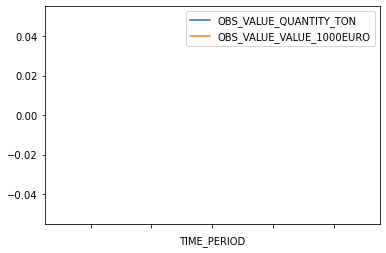

In [27]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Germany')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()



<AxesSubplot:xlabel='TIME_PERIOD'>

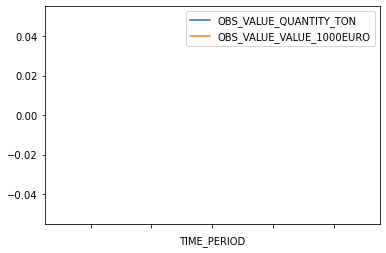

In [28]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Belgium')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()


<AxesSubplot:xlabel='TIME_PERIOD'>

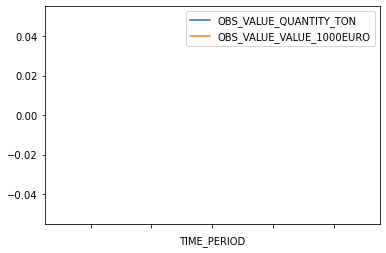

In [29]:
trade_data_pivot[(trade_data_pivot['PARTNER_Labels']=='Ukraine')&
                 (trade_data_pivot['TIME_PERIOD']>=date_filter)&
                (trade_data_pivot['product']==product_filter)]\
[['TIME_PERIOD', 'OBS_VALUE_QUANTITY_TON', 'OBS_VALUE_VALUE_1000EURO']]\
.set_index('TIME_PERIOD').plot()
